In [1]:
#Program to show working of NPV
import numpy_financial as npf

#declaring values
values = [45, 50, 40, -100]
rate1 = 0.50
rate2 = 0.30
rate3 = 1
#Printing NPV Values
print("NPV value with rate ", rate1, " is: ", npf.npv(rate1, values))
print("NPV value with rate ", rate2, " is: ", npf.npv(rate2, values))
print("NPV value with rate ", rate3, " is: ", npf.npv(rate3, values))

NPV value with rate  0.5  is:  66.48148148148148
NPV value with rate  0.3  is:  61.61356395084205
NPV value with rate  1  is:  67.5


In [21]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

# Configuration
random_seed = 31415
np.random.seed(random_seed)
sns.set_style('whitegrid')
avg = 100
std_dev = 5
num_reps = 500 # 
num_simulations = 1000

In [8]:
np.random.seed(random_seed)
demand = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

demand[0:10]

array([[106.81210941, 105.67054092, 111.81537244, ..., 106.39333327,
        100.10014694,  97.05109862],
       [ 92.33498705,  94.67245051, 103.66811902, ..., 105.68356604,
         91.84304404, 102.75439248],
       [ 91.3772181 , 100.99826813,  99.69655771, ...,  93.95450975,
         96.89497132,  96.02689124],
       ...,
       [105.64601163, 103.77294814,  99.04340628, ..., 101.6995599 ,
        100.45176124,  97.98840642],
       [105.11244943, 106.76230591, 100.72956337, ..., 100.02371143,
         92.73777851, 104.58301703],
       [107.79541354, 105.67668218,  96.39511074, ...,  97.01065375,
         93.3498892 ,  97.22951945]])

<AxesSubplot:>

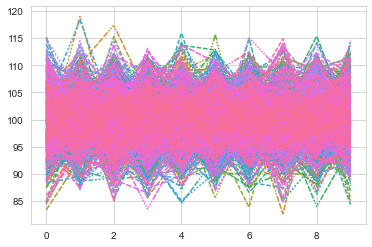

In [12]:
sns.lineplot(
    data=demand[:10],
    legend=False
)

In [7]:
for i in range(10):
    print("NPV value with rate ", i/10, " is: ", npf.npv(i, demand[i]))

NPV value with rate  0.0  is:  100030.3765841132
NPV value with rate  0.1  is:  inf
NPV value with rate  0.2  is:  141.89854218767752
NPV value with rate  0.3  is:  inf
NPV value with rate  0.4  is:  125.36726213368435
NPV value with rate  0.5  is:  inf
NPV value with rate  0.6  is:  115.53712021665761
NPV value with rate  0.7  is:  inf
NPV value with rate  0.8  is:  118.3582577275425
NPV value with rate  0.9  is:  inf


## Brownian motion

In [13]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

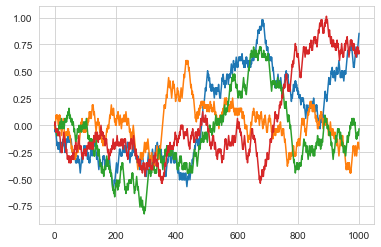

In [16]:
b = Brownian()
for i in range(4):
    sns.lineplot(data=b.gen_random_walk(1000))

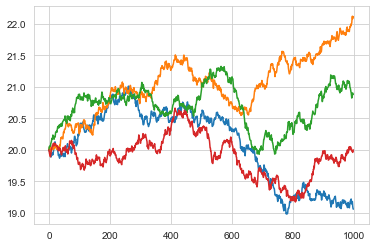

In [17]:
b = Brownian(20)
for i in range(4):
    sns.lineplot(data=b.gen_normal(1000))

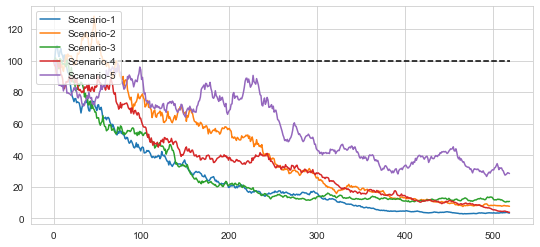

In [23]:
def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        sns.lineplot(data=b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

plot_stock_price(mu=0.2,sigma=0.7)

## More MC

In [2]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

sales_target[0:10]

NameError: name 'np' is not defined

In [ ]:

commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

commission_percentages[0:10]

In [ ]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)
total_commissions.std()

In [ ]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

In [ ]:
df.plot(kind='hist', title='Commissions Distribution')

In [ ]:
df.describe()